In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Overview 


The steps to get started are:

1. Create Amazon Web Services Account
2. Set Up Your Cloud Computing Server
3. Connect to Your Server
4. Setting Up Your Jupyter Notebook
5. Connecting to Jupyter in The Browser

## Step-by-Step guide 

### 1. Create an AWS account

You need an EC2 instance, but first create your account here https://portal.aws.amazon.com/billing/signup#/start

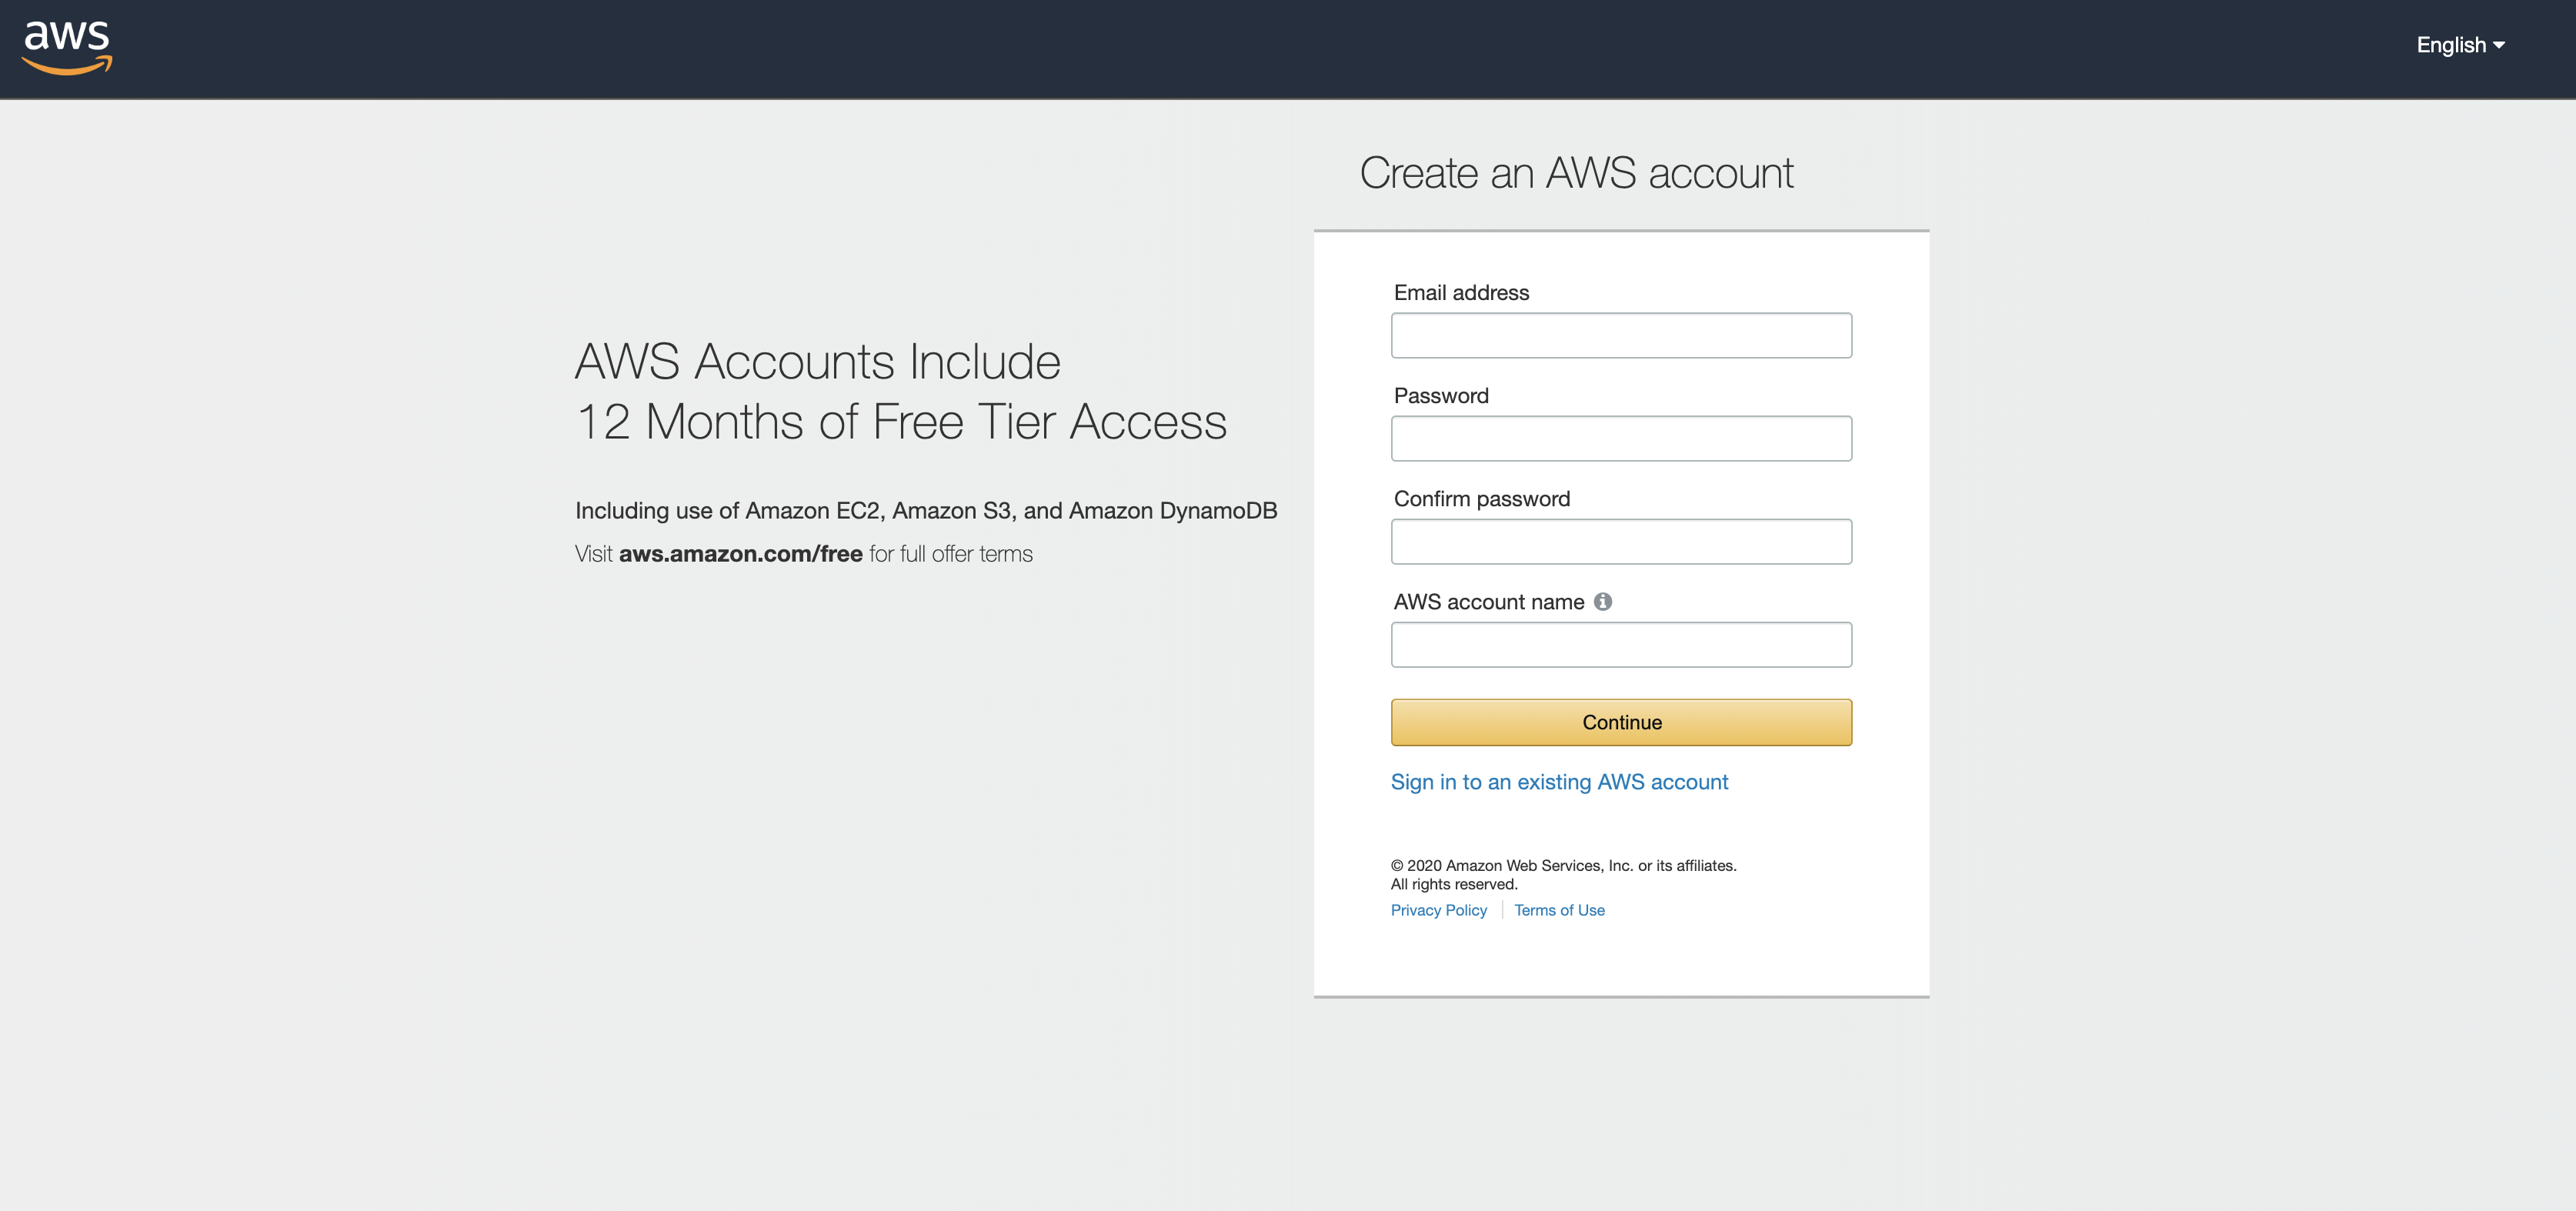

In [2]:
from IPython.display import Image
Image("images/aws_create_account.png")

### 2. Set Up Your Cloud Computing Server


Navigate to EC2 instance. Select "Launch Instance"

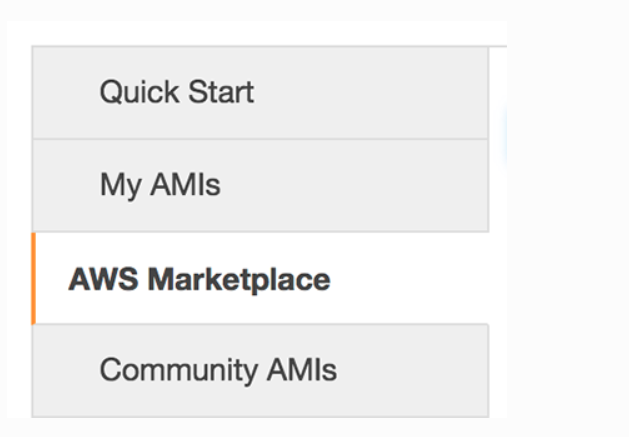

In [3]:
from IPython.display import Image
Image("images/ec2.png")

The instances with GPU’s are those that start with either g2 or p2. I recommend the p2.xlarge, which costs a little less than a dollar an hour. If you want something less expensive, the g2.2xlarge is about $0.65/hr, though it isn’t quite as fast or as powerful.

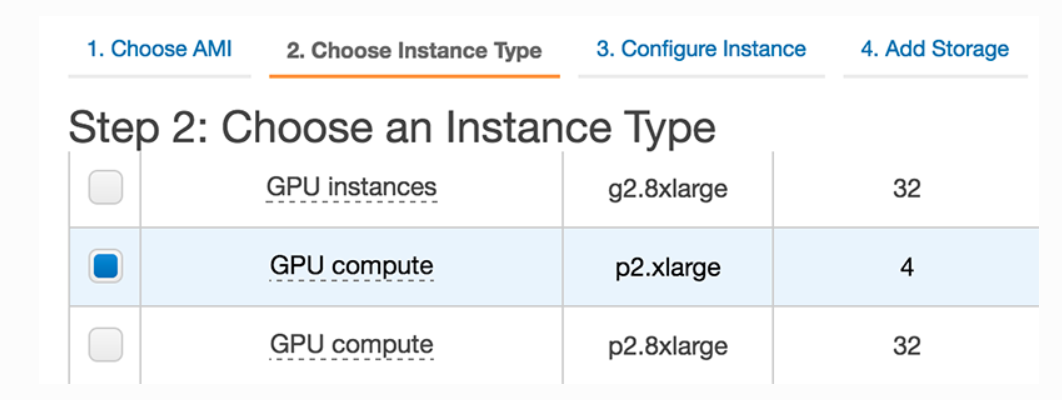

In [4]:
Image("images/instance.png")

**Set up Security Group**

Create a custom TCP rule to allow port 8888

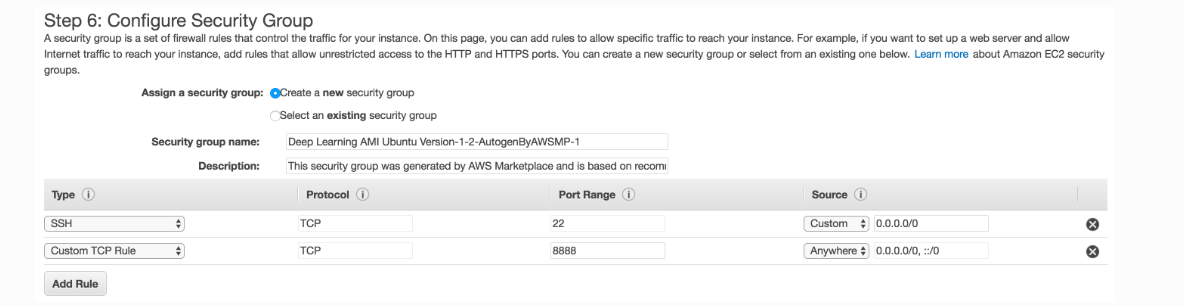

In [5]:
Image("images/security.png")

### 3. Connect to Your Server


You may need to change the access priveleges for the file for your key. In MacOS and Linux this can be done with the command

```chmod 400 YourKeyName.pem```

Then type

```ssh -i YourKeyName.pem ubuntu@X.X.X.X```

* X.X.X.X is the IPv4 Public IP found in AWS, and
* YourKeyName.pem is the name of your .pem file.
Note that if you've used a different AMI or specified a username, ubuntu will be replaced with the username, such as ec2-user for some Amazon AMI's. You would then instead enter ssh -i YourKeyName.pem ec2-user@X.X.X.X


### 4. Setting Up Your Jupyter Notebook


In your instance, in order to create a config file for your Jupyter notebook settings, type: 

```jupyter notebook --generate-config```

Then, to change the IP address config setting for notebooks (this is just a fancy one-line command to perform an exact string match replacement; you could do the same thing manually using vi/vim/nano/etc.), type: 

```sed -ie "s/#c.NotebookApp.ip = 'localhost'/#c.NotebookApp.ip = '*'/g" ~/.jupyter/jupyter_notebook_config.py```

### 5. Connecting to Jupyter in The Browser


On the Ec2 Instance, type:
    
```jupyter notebook --ip=0.0.0.0 --no-browser```

From your local machine

* You will need the token generated by your jupyter notebook to access it. On your instance terminal, there will be the following line: Copy/paste this URL into your browser when you connect for the first time, to login with a token:. Copy everything starting with the :8888/?token=.

* Access the Jupyter notebook index from your web browser by visiting: X.X.X.X:8888/?token=... (where X.X.X.X is the IP address of your EC2 instance and everything starting with :8888/?token= is what you just copied).



## Tips

- Cost: be careful with AWS GPU instances, if you forget to STOP or SHUTDOWN, it can get quite expensive.
